# 배관 공사 플랫폼 설문 응답 분석 (주관식 문항)

In [1]:
# 파이썬 Library Load
import pandas as pd
import numpy as np
import PowerXlwings as px
from konlpy.tag import Twitter
import ckonlpy

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl
# 한글 폰트 적용
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [101]:
from konlpy.tag import Hannanum
from konlpy.tag import Twitter
from konlpy.tag import Kkma
hannanum=Hannanum()
twitter=Twitter()
kkma = Kkma()

C:\Users\SEOL\anaconda3\envs\ts\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [2]:
# 파일 불러오기
excel_file=px.get()
print(excel_file)

C:/Users/SEOL/Desktop/PYJ/인강실습자료_파이썬_LDA.xlsx


# 설문 조사 자료 전처리 

## Data 구조 탐색

In [3]:
df=px.setpd(wb=excel_file,sheet='설문결과정리',rng='A3',expand=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 96 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               45 non-null     float64
 1   이름                45 non-null     object 
 2   설문 송부             45 non-null     object 
 3   회신 여부             45 non-null     object 
 4   작성율               45 non-null     float64
 5   직급/직책             45 non-null     object 
 6   Dept.             45 non-null     object 
 7   Pjt               45 non-null     object 
 8   직무경력_FCM          2 non-null      object 
 9   직무경력_FCE          11 non-null     object 
 10  직무경력_SI           18 non-null     object 
 11  직무경력_SV           38 non-null     object 
 12  직무경력_기타           3 non-null      object 
 13  상품경력_산업           16 non-null     float64
 14  상품경력_환경           34 non-null     float64
 15  상품경력_화공           14 non-null     float64
 16  상품경력_기타           10 non-null     float64
 17 

In [8]:
df_basic=df.iloc[:,0:16]
df_basic.info()
df_basic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No.       45 non-null     float64
 1   이름        45 non-null     object 
 2   설문 송부     45 non-null     object 
 3   회신 여부     45 non-null     object 
 4   작성율       45 non-null     float64
 5   직급/직책     45 non-null     object 
 6   Dept.     45 non-null     object 
 7   Pjt       45 non-null     object 
 8   직무경력_FCM  2 non-null      object 
 9   직무경력_FCE  11 non-null     object 
 10  직무경력_SI   18 non-null     object 
 11  직무경력_SV   38 non-null     object 
 12  직무경력_기타   3 non-null      object 
 13  상품경력_산업   16 non-null     float64
 14  상품경력_환경   34 non-null     float64
 15  상품경력_화공   14 non-null     float64
dtypes: float64(5), object(11)
memory usage: 5.8+ KB


,No.,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공
0,2.0,서영민,최초,O,0.810127,SI,산업,평택 Linde ASU,None,None,5~10년,None,None,4.0,NaN,10.0
1,12.0,방기동,최초,O,0.936709,SV,산업,탕정 A2/A3 PJT,None,None,None,5~10년,None,8.0,NaN,NaN
2,15.0,유형찬,최초,O,1.000000,SV,산업,탕정 C-PJT,None,5년 미만,None,5~10년,None,11.0,NaN,NaN
3,23.0,홍성민,최초,O,0.873418,SV,산업,중국 천진법인 제2공장 증설공사,None,None,None,5~10년,None,6.0,NaN,NaN
4,26.0,김동경,최초,O,0.835443,SI,산업,헝가리 SDI,None,None,5~10년,10~15년,None,22.0,3.0,NaN


In [13]:
df_basic=df_basic.drop('No.',axis=1)
df_basic.tail()

,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공
40,이석준,추가,O,0.291139,SV,환경,전자 P2-PJT 초순수,None,None,5년 미만,5~10년,None,NaN,2.0,12.0
41,이승철,추가,O,0.329114,SV,환경,전자 P2-PJT 초순수,None,None,None,5~10년,None,NaN,5.0,NaN
42,장덕진,추가,O,0.291139,SV,환경,전자 P2-PJT 초순수,None,None,None,5년 미만,None,NaN,1.5,NaN
43,조재영,추가,O,0.189873,SV,환경,전자 P2-PJT 초순수,None,None,None,5~10년,None,NaN,9.6,NaN
44,천상진,추가,O,0.924051,SI,산업,헝가리 SDI,None,None,5년 미만,20년 이상,None,5.0,NaN,6.0


In [15]:
df_basic.tail()

,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공
40,이석준,추가,O,0.291139,SV,환경,전자 P2-PJT 초순수,None,None,5년 미만,5~10년,None,NaN,2.0,12.0
41,이승철,추가,O,0.329114,SV,환경,전자 P2-PJT 초순수,None,None,None,5~10년,None,NaN,5.0,NaN
42,장덕진,추가,O,0.291139,SV,환경,전자 P2-PJT 초순수,None,None,None,5년 미만,None,NaN,1.5,NaN
43,조재영,추가,O,0.189873,SV,환경,전자 P2-PJT 초순수,None,None,None,5~10년,None,NaN,9.6,NaN
44,천상진,추가,O,0.924051,SI,산업,헝가리 SDI,None,None,5년 미만,20년 이상,None,5.0,NaN,6.0


In [30]:
df_approval=df.loc[:,['자재승인요청_필요',"자재승인요청_필요항목","자재승인요청_가능성","자재승인요청_가능성이유"]]

In [31]:
df_approval.head()

,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
0,4.0,현재 자재구매는 업체에서 수행 합니다.,4.0,현재 자재구매는 업체에서 수행 합니다.
1,3.0,"자료 업로드하여 문서관리, 필요시 즉시 열람",3.0,"외부 승인자(감리, 발주처)가 시스템 접근이 되어야 효과 발생, 안될 경우 내부 시..."
2,5.0,자재승인업무 중 결재라인 자동화필요,5.0,방대한 자료 및 복잡한 결재절차
3,5.0,여러 품목에 대한 서류 작성에 시간이 소모됨,3.0,시스템 구축이 안되있음 (Data 확보 필요)
4,4.0,승인서류,3.0,자재승인의 절차상 공사업체 자료제출-> SECL 검토 -> 발주처 승인요청으로 자동...


## 시각화 : 자재 승인 요청 

### 데이터 사전처리

In [36]:
df_approval=pd.concat([df_basic,df_approval],axis=1)

In [60]:
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   이름            45 non-null     object 
 1   설문 송부         45 non-null     object 
 2   회신 여부         45 non-null     object 
 3   작성율           45 non-null     float64
 4   직급/직책         45 non-null     object 
 5   Dept.         45 non-null     object 
 6   Pjt           45 non-null     object 
 7   직무경력_FCM      2 non-null      object 
 8   직무경력_FCE      11 non-null     object 
 9   직무경력_SI       18 non-null     object 
 10  직무경력_SV       38 non-null     object 
 11  직무경력_기타       3 non-null      object 
 12  상품경력_산업       16 non-null     float64
 13  상품경력_환경       34 non-null     float64
 14  상품경력_화공       14 non-null     float64
 15  자재승인요청_필요     32 non-null     float64
 16  자재승인요청_필요항목   29 non-null     object 
 17  자재승인요청_가능성    30 non-null     float64
 18  자재승인요청_가능성이유  30 non-null     ob

In [37]:
df_approval.head()

,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
0,서영민,최초,O,0.810127,SI,산업,평택 Linde ASU,None,None,5~10년,None,None,4.0,NaN,10.0,4.0,현재 자재구매는 업체에서 수행 합니다.,4.0,현재 자재구매는 업체에서 수행 합니다.
1,방기동,최초,O,0.936709,SV,산업,탕정 A2/A3 PJT,None,None,None,5~10년,None,8.0,NaN,NaN,3.0,"자료 업로드하여 문서관리, 필요시 즉시 열람",3.0,"외부 승인자(감리, 발주처)가 시스템 접근이 되어야 효과 발생, 안될 경우 내부 시..."
2,유형찬,최초,O,1.000000,SV,산업,탕정 C-PJT,None,5년 미만,None,5~10년,None,11.0,NaN,NaN,5.0,자재승인업무 중 결재라인 자동화필요,5.0,방대한 자료 및 복잡한 결재절차
3,홍성민,최초,O,0.873418,SV,산업,중국 천진법인 제2공장 증설공사,None,None,None,5~10년,None,6.0,NaN,NaN,5.0,여러 품목에 대한 서류 작성에 시간이 소모됨,3.0,시스템 구축이 안되있음 (Data 확보 필요)
4,김동경,최초,O,0.835443,SI,산업,헝가리 SDI,None,None,5~10년,10~15년,None,22.0,3.0,NaN,4.0,승인서류,3.0,자재승인의 절차상 공사업체 자료제출-> SECL 검토 -> 발주처 승인요청으로 자동...


In [89]:
df_approval_filtered1=df_approval.loc[ df['자재승인요청_필요'].notnull(), ['직급/직책','자재승인요청_필요',"자재승인요청_필요항목","자재승인요청_가능성","자재승인요청_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"자재승인요청_필요":"int64"})

In [88]:
df_approval_filtered2=df_approval.loc[ df['자재승인요청_가능성'].notnull(), ['직급/직책','자재승인요청_필요',"자재승인요청_필요항목","자재승인요청_가능성","자재승인요청_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"자재승인요청_가능성":"int64"})

## 시각화 : 자재 승인 요청 업무 설문 결과 

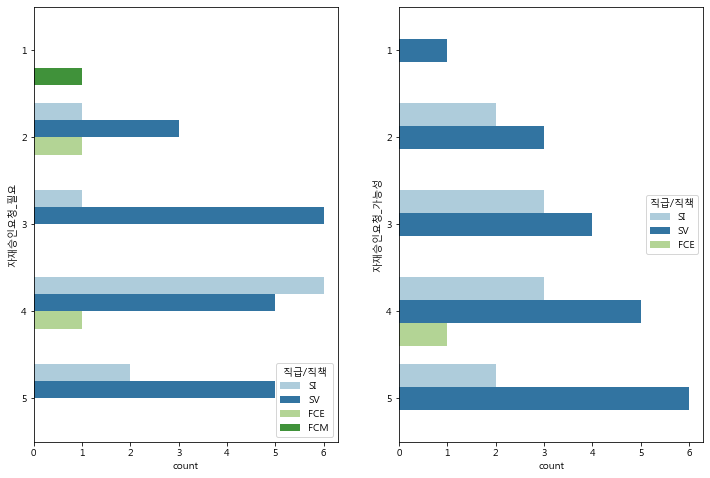

In [92]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='자재승인요청_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='자재승인요청_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

## 설문 문항 작성 분석 - 필요시 LDA 혹은 word cloud 적용

In [94]:
# 1~5점 까지 어떤 응답을 하였는가 분석
# 자료가 한두개인 경우 LDA 미적용 
# 응답횟수가 여러개인 경우 LDA로 Topic이 뭔지 추출 

### 자재 승인 요청 필요성 - 1점

In [96]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==1]

,직급/직책,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
29,FCM,1,None,NaN,None


### 자재 승인 요청 필요성 - 2점

In [98]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==2,["자재승인요청_필요항목"]]

,자재승인요청_필요항목
5,VP를 PDF로 접수. 추후 필요시 시스템 조회. 서지보관 불필요
17,딱히 없음.
21,"동일 지역,사업별로 승인 완료 된 자재승인원이 시스템에 업로드 되었으면 좋겠다.\n..."
22,None
34,None


In [99]:
px.to_excel(data=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==2,["자재승인요청_필요항목"]],rng="A1")

<Sheet [통합 문서1]Sheet1>

### 자재 승인 요청 필요성 - 3점

In [102]:
df_app_need_text3=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==3,["자재승인요청_필요항목"]]

In [103]:
df_app_need_text3


,자재승인요청_필요항목
1,"자료 업로드하여 문서관리, 필요시 즉시 열람"
8,BIM 도면에서 물량 추출 자동화
14,전 현장 기승인자재 확인/즉시 적용 가능하도록 DB 구축
15,전 현장 기승인자재 확인/즉시 적용 가능하도록 DB 구축
24,기존 PJT에 사용한 자재 승인 자동화
40,입고 관련 서류
43,설계와 연동 자재구매


In [107]:
# twitter.pos("자료 업로드하여 문서관리, 필요시 즉시 열람")

### 자재 승인 요청 필요성 - 4점

In [108]:
df_app_need_text4=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==4,["자재승인요청_필요항목"]]

In [109]:
df_app_need_text4

,자재승인요청_필요항목
0,현재 자재구매는 업체에서 수행 합니다.
4,승인서류
6,승인 관련 서류 와 VP Upload한것이 있으면 좋겠다
9,승인이 누락되는 일이 없도록 알람이나 체크시트 등이 포함되면 좋겠다.
13,DB 구축하여 승인서류 자동 제출
16,전 현장 기승인자재 확인/즉시 적용 가능하도록 DB 구축
23,"자재 공급원 승인 : 수많은 현장에서 자재 승인 서류를 올리는데, 각 현장에서 따로..."
27,"자재승인원 서류 작성 (BM, CQI목록 취합, 관련도면, VP 等 관련자료 자동연결)"
33,旣사용되고 있는 자재 및 동일품목 자재에 대한 Data Base化 구축
36,"ERP, Material Code별 재고 파악 등 적용"


In [123]:
words=px.LToS(df_app_need_text4['자재승인요청_필요항목'].tolist())
t=twitter.pos(words)

In [145]:
px.to_excel(data=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==4,["자재승인요청_필요항목"]],rng="A1")

<Sheet [통합 문서2]Sheet1>

In [138]:
textlist=[]
for i in range(len(t)):
    if t[i][1]== "Noun" or t[i][1]=="Alpha":
        textlist.append(t[i][0])
        


In [139]:
textlist

['현재',
 '자재',
 '구매',
 '업체',
 '수행',
 '승인',
 '서류',
 '승인',
 '관련',
 '서류',
 'VP',
 'Upload',
 '것',
 '승인',
 '누락',
 '알람',
 '체크',
 '시트',
 '등',
 '포함',
 'DB',
 '구축',
 '승인',
 '서류',
 '자동',
 '제출',
 '전',
 '현장',
 '기승',
 '자재',
 '확인',
 '즉시',
 '적용',
 'DB',
 '구축',
 '자재',
 '공급원',
 '승인',
 '현장',
 '자재',
 '승인',
 '서류',
 '각',
 '현장',
 'Vendor',
 '연락',
 '필요',
 '서류',
 '접수',
 '본사',
 '차원',
 '대형',
 'Vendor',
 '철골',
 '배관',
 '덕트',
 '케이블',
 '밸브',
 '펌프',
 '등',
 '의',
 '각종',
 '서류',
 '카달',
 '로그',
 '지방세',
 '국세',
 '납부',
 '확인',
 '공장',
 '등록증',
 '각종',
 '시험',
 '성적',
 '를',
 '시스템',
 '업로드',
 '현장',
 '담당',
 '추출',
 '수',
 '해당',
 '업무',
 '주로',
 '협력',
 '사',
 '수행',
 '서류',
 '미비',
 '시',
 'SECL',
 '담당',
 'Vendor',
 '직접',
 '연락',
 '경우',
 '자재',
 '검사',
 '종별',
 '현장',
 '별',
 '자재',
 '검품',
 '위치',
 '시스템',
 '협력',
 '사가',
 '자재',
 '검사',
 '신청',
 '감리',
 'secl',
 '담당',
 '자동',
 '연락',
 '검사',
 '것',
 '지금',
 '자재',
 '때',
 '감리',
 '약속',
 '정해',
 '검수',
 '자재',
 '승인',
 '서류',
 '작성',
 'BM',
 'CQI',
 '목록',
 '취합',
 '관련',
 '도면',
 'VP',
 '관련',
 '자료',
 '자동',
 '연결',
 '사용',
 '자재'

In [141]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [143]:
# noun_doc = ' '.join(textlist)
# noun_doc = noun_doc.strip()

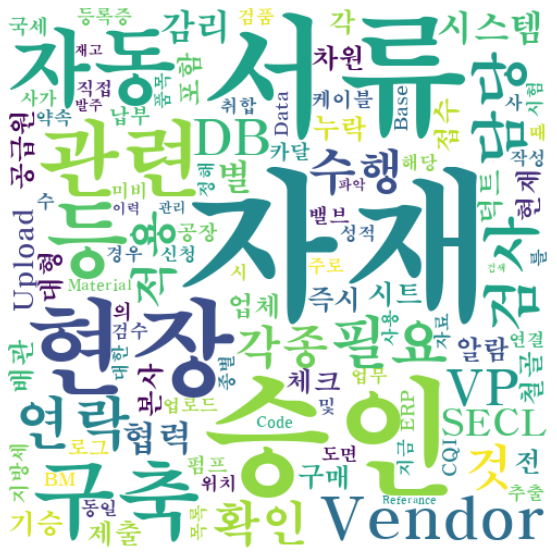

In [144]:
# font_path="C:/Windows/Fonts/H2MJRE.TTF"  #폰트
# background_color="white"      #배경색
# margin=3                     #모서리 여백 넓이
# min_font_size=7              #최소 글자 크기
# max_font_size=150             #최대 글자 크기
# width=500                     #이미지 가로 크기
# height=500                    #이미지 세로 크기
# wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
#                min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
# wc.generate(noun_doc)

# plt.figure(figsize=(10, 10))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [157]:
sentences=df_app_need_text4["자재승인요청_필요항목"].tolist()
len(sentences)

12

In [164]:
sentence=sentences[0]
sentence

'현재 자재구매는 업체에서 수행 합니다.'

In [163]:
twitter.pos(sentences[0])[0][1]

'Noun'

In [166]:
# 명사와 영어단어 추가하기 
textlist=[]
line_list=[]
for sentence in sentences:
    textlist=[]
    t=twitter.pos(sentence)
    for i in range(len(t)):
        if t[i][1]== "Noun" or t[i][1]=="Alpha":
            textlist.append(t[i][0])
    line_list.append(textlist)
        

In [167]:
line_list

[['현재', '자재', '구매', '업체', '수행'],
 ['승인', '서류'],
 ['승인', '관련', '서류', 'VP', 'Upload', '것'],
 ['승인', '누락', '알람', '체크', '시트', '등', '포함'],
 ['DB', '구축', '승인', '서류', '자동', '제출'],
 ['전', '현장', '기승', '자재', '확인', '즉시', '적용', 'DB', '구축'],
 ['자재',
  '공급원',
  '승인',
  '현장',
  '자재',
  '승인',
  '서류',
  '각',
  '현장',
  'Vendor',
  '연락',
  '필요',
  '서류',
  '접수',
  '본사',
  '차원',
  '대형',
  'Vendor',
  '철골',
  '배관',
  '덕트',
  '케이블',
  '밸브',
  '펌프',
  '등',
  '의',
  '각종',
  '서류',
  '카달',
  '로그',
  '지방세',
  '국세',
  '납부',
  '확인',
  '공장',
  '등록증',
  '각종',
  '시험',
  '성적',
  '를',
  '시스템',
  '업로드',
  '현장',
  '담당',
  '추출',
  '수',
  '해당',
  '업무',
  '주로',
  '협력',
  '사',
  '수행',
  '서류',
  '미비',
  '시',
  'SECL',
  '담당',
  'Vendor',
  '직접',
  '연락',
  '경우',
  '자재',
  '검사',
  '종별',
  '현장',
  '별',
  '자재',
  '검품',
  '위치',
  '시스템',
  '협력',
  '사가',
  '자재',
  '검사',
  '신청',
  '감리',
  'secl',
  '담당',
  '자동',
  '연락',
  '검사',
  '것',
  '지금',
  '자재',
  '때',
  '감리',
  '약속',
  '정해',
  '검수'],
 ['자재',
  '승인',
  '서류',
  '작성',
  'BM',
  'CQ

In [189]:
# import gensim
# from gensim import corpora
# import logging
# logging.basicConfig(level=logging.DEBUG)
# topic = 5
# keyword = 10
# texts = []
# resultList = []
# stop_list = ["별","등","의"]
# for line in line_list:
#     words = line
#     if words != [""]:
#         tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
#         texts.append(tokens)
# dictionary = corpora.Dictionary(texts)    
# corpus = [dictionary.doc2bow(text) for text in texts]

# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=5)
# for num in range(topic):
#     resultList.append(ldamodel.show_topic(num, keyword))

In [186]:
topic1=[resultList[0][i][0] for i in range(0,keyword)]
topic2=[resultList[1][i][0] for i in range(0,keyword)]
topic3=[resultList[2][i][0] for i in range(0,keyword)]
topic4=[resultList[3][i][0] for i in range(0,keyword)]
topic5=[resultList[4][i][0] for i in range(0,keyword)]

In [187]:
df_topic=pd.DataFrame(data={'topic1':topic1,'topic2':topic2,"topic3":topic3,"topic4":topic4,"topic5":topic5})

In [188]:
df_topic

,topic1,topic2,topic3,topic4,topic5
0,자재,승인,승인,자재,현장
1,구축,VP,서류,서류,자재
2,DB,관련,자재,승인,검사
3,현장,재고,발주,현장,연락
4,서류,파악,적용,필요,서류
5,승인,알람,구축,Vendor,Vendor
6,자동,시트,DB,담당,담당
7,수행,포함,관련,연락,감리
8,확인,체크,필요,검사,협력
9,적용,ERP,VP,관련,승인


###  자재 승인 요청 필요성 - 5점

In [192]:
df_app_need_text=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==5,["자재승인요청_필요항목"]]

print(df_app_need_text.shape)
df_app_need_text

(7, 1)


,자재승인요청_필요항목
2,자재승인업무 중 결재라인 자동화필요
3,여러 품목에 대한 서류 작성에 시간이 소모됨
7,"승인관련서류(사업자등록증, 공장등록증 외), VP"
25,서류 및 VP Upload 자동화
26,서류 및 VP Upload
28,진행형황 수시 확인가능 및 관련자 모두 확인이 용이
35,서류 및 VP Upload 자동화
